In [2]:
from matplotlib import rc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
BIC = [1.76465859,1.563475244,1.563475244,1.563475244,1.563475244,1.563475244,1.563475244,1.563475244,1.563475244,1.563475244,3.195581354,3.195581354,3.92185637,4.605693874,4.655496661,4.648646231,5.338223341,5.463105543,5.463105543,5.463105543,5.463105543]
NMI = [0.643739107,1,1,1,1,1,1,1,1,1,0.942505834,0.942505834,0.83763613,0.739311783,0.680176995,0.704568917,0.297982168,0,0,0,0]
lambda_list = [0,1.9,3.8,5.7,7.6,9.5,11.4,13.3,15.2,17.1,19,20.9,22.8,24.7,26.6,28.5,30.4,32.3,34.2,36.1,38]

In [3]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

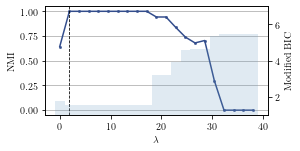

In [23]:
fig = plt.figure(figsize=(4,2))
ax1 = fig.add_subplot(111)

line_color = [0.2, 0.3, 0.55]
mark_color = [0.2, 0.3, 0.55]
bar_color = [0.4, 0.6, 0.75]

ax1.plot(lambda_list, NMI, 's-k', linewidth=1.5, color=line_color, ms=1.5, mec=mark_color,mfc=mark_color)
ax1.set_ylim([-0.05, 1.05])
index = BIC.index(min(BIC))
ax1.plot([lambda_list[index], lambda_list[index]], [-.05,1.05],'--k', linewidth=0.8)
ax1.set_ylabel('NMI')
ax1.set_xlabel(r'$\lambda$')
plt.grid(axis='y')

ax2 = ax1.twinx()
ax2.bar(lambda_list, BIC, width=1.9, facecolor=bar_color, alpha=0.2)
ax2.set_ylim([1, 7])
ax2.set_ylabel('Modified BIC')

plt.savefig('single.pdf',format='pdf',bbox_inches = 'tight')
plt.show()

In [3]:
## Time vs p+q
time_p_ee_1 = np.log10([0.015676,0.018846,0.025481,0.031298,0.069981,0.136847])
#time_p_ee_2 = np.log10([0.043307, 0.046976, 0.281083])
time_p_kmns_1 = np.log10([0.01839,0.017959,0.024296,0.031713,0.066669,0.140942])
#time_p_kmns_2 = np.log10([0.037836, 0.042335, 0.283173])
time_p_mtl_1 = np.log10([108.062820, 184.27935,648.536421,1317.076555])
p = [0,1,2,3,4,5]



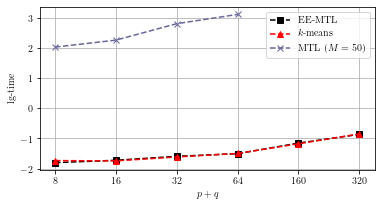

In [4]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
ax.set_xticks([0, 1,2,3,4,5])
ax.set_xticklabels([8, 16,32,64,160,320])
ax.set_xlabel(r'$p+q$')
ax.set_ylabel('lg-time')

EE_color = 'k'
kmns_color = 'r'
mtl_color = [0.4,0.4,0.6]

ax.plot(p, time_p_ee_1, 's--', color=EE_color, ms=6, label=r'EE-MTL')
#ax.plot(p, time_p_ee_2,'s-k', ms=4, label=r'EE-MTL ($M=100$)')

ax.plot(p, time_p_kmns_1,'^--', color=kmns_color, ms=6, label=r'$k$-means')
#ax.plot(p, time_p_kmns_2,'^-r', ms=4, label=r'$k$-means ($M=100$)')

ax.plot(p[:4], time_p_mtl_1, 'x--', color=mtl_color, ms=6, label=r'MTL ($M=50$)')

plt.grid(axis='both')
plt.legend(loc='upper right')
plt.savefig('time-p.pdf',format='pdf',bbox_inches = 'tight')
plt.show()

In [140]:
## Time vs M
time_M_ee_1 = np.log10([0.015676, 0.043307])
time_M_ee_2 = np.log10([0.025481, 0.046976])
time_M_ee_3 = np.log10([0.136847, 0.281083])

time_M_kmns_1 = np.log10([0.018390, 0.037836])
time_M_kmns_2 = np.log10([0.024296, 0.042335])
time_M_kmns_3 = np.log10([0.140942, 0.283173])

time_M_mtl_1 = np.log10([6.0079])
time_M_mtl_2 = np.log10([12.42582])

M = [0,1]

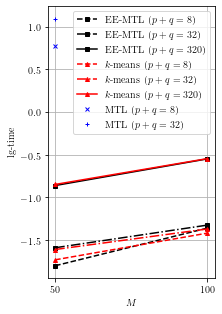

In [156]:
fig = plt.figure(figsize=(3,5))
ax = fig.add_subplot(111)
ax.set_xticks([0, 1])
ax.set_xticklabels([50,100])
ax.set_xlabel(r'$M$')
ax.set_ylabel('lg-time')
ax.plot(M, time_M_ee_1, 's--k', ms=4, label=r'EE-MTL ($p+q=8$)')
ax.plot(M, time_M_ee_2,'s-.k', ms=4, label=r'EE-MTL ($p+q=32$)')
ax.plot(M, time_M_ee_3,'s-k', ms=4, label=r'EE-MTL ($p+q=320$)')

ax.plot(M, time_M_kmns_1,'^--r', ms=4, label=r'$k$-means ($p+q=8$)')
ax.plot(M, time_M_kmns_2,'^-.r', ms=4, label=r'$k$-means ($p+q=32$)')
ax.plot(M, time_M_kmns_3,'^-r', ms=4, label=r'$k$-means ($p+q=320$)')

ax.plot(M[:1], time_M_mtl_1, 'xb', ms=4, label=r'MTL ($p+q=8$)')
ax.plot(M[:1], time_M_mtl_2, '+b', ms=4, label=r'MTL ($p+q=32$)')

plt.grid(axis='both')
plt.legend(loc='upper right')
plt.savefig('time-M.pdf',format='pdf',bbox_inches = 'tight')
plt.show()

In [5]:
## NMI vs p+q
nmi_ee = [1]*6
nmi_kmns = [0.9781,0.9797,0.9607,0.9529,0.9603,0.9633]
nmi_mtl = [1,1,0.9567,0.9571,0,0]
p = np.array([0, 1, 2, 3, 4, 5])
width = 0.2

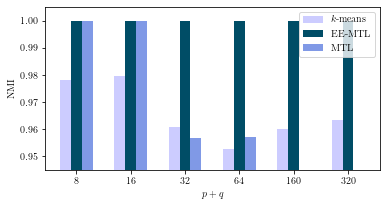

In [17]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)
ax.set_xticks([0, 1,2,3,4,5])
ax.set_xticklabels([8, 16,32,64,160,320])
ax.set_xlabel(r'$p+q$')
ax.set_ylabel('NMI')
ax.set_ylim([0.945,1.005])

EE_color = [0,0.3,0.4]
kmns_color = [0.8,0.8,1]
mtl_color = [0.5,0.6,0.9]

ax.bar(p-width, nmi_kmns, width, color=kmns_color, label=r'$k$-means')
ax.bar(p, nmi_ee, width, color=EE_color, label=r'EE-MTL')
ax.bar(p+width, nmi_mtl, width, color=mtl_color, label=r'MTL')

#plt.grid(axis='y')
plt.legend(loc='best')
plt.savefig('nmi-p.pdf',format='pdf',bbox_inches = 'tight')
plt.show()

In [23]:
result_dishes = pd.read_csv(r'results/Report_dishes.csv')
result_cd = pd.read_csv(r'results/Report_cd.csv')
result_kmns = pd.read_csv(r'results/Report_kmns.csv')

print('DISHES:')
print(result_dishes)

print('CD Fusion:')
print(result_cd)

print('Kmns:')
print(result_kmns)

DISHES:
    Case  Timecost  S_mean  S_std       NMI  Perfect_recover
0      1  0.094766     3.0    0.0  0.991835             0.98
1      2  0.311231     3.0    0.0  0.995557             0.99
2      3  0.502743     3.0    0.0  0.991663             0.97
3      4  0.848696     3.0    0.0  0.997098             0.99
4      5  1.299828     3.0    0.0  0.997698             0.99
5      6  1.842417     3.0    0.0  0.993544             0.98
6      7  0.092186     5.0    0.0  1.000000             1.00
7      8  0.105950     7.0    0.0  1.000000             1.00
8      9  0.120363     9.0    0.0  1.000000             1.00
9     10  0.135369     3.0    0.0  1.000000             1.00
10    11  0.216826     3.0    0.0  1.000000             1.00
11    12  0.296127     3.0    0.0  1.000000             1.00
12    13  0.388028     3.0    0.0  1.000000             1.00
13    14  0.161578     3.0    0.0  0.980284             0.95
14    15  0.302693     3.0    0.0  0.982047             0.96
15    16  0.4968

In [ ]:
def time_vs_var(dishes, kmns, cd, var):
    fig = plt.figure(figsize=(6,3))
    ax = fig.add_subplot(111)

    p = [20, 40, 60, 80, 100]
    ax.set_xticks(p)
    ax.set_xlabel(r'$p+q$')
    ax.set_ylabel('lg-time')

    EE_color = 'r'
    kmns_color = 'k'
    mtl_color = [0.4,0.4,0.6]

    ax.plot(p, np.log10(result_dishes['Timecost'][[0,9,10,11,12]]), 's--', color=EE_color, ms=6, label=r'DISHES')
    #ax.plot(p, time_p_ee_2,'s-k', ms=4, label=r'EE-MTL ($M=100$)')

    ax.plot(p, np.log10(result_kmns['Timecost'][[0,9,10,11,12]]),'^--', color=kmns_color, ms=6, label=r'$k$-means')
    #ax.plot(p, time_p_kmns_2,'^-r', ms=4, label=r'$k$-means ($M=100$)')

    ax.plot(p[:1], np.log10(result_cd['Timecost'][0]), 'x--', color=mtl_color, ms=6, label=r'CD Fusion')

    plt.grid(axis='both')
    plt.legend(loc='upper right')
    plt.savefig('time-p.pdf',format='pdf',bbox_inches = 'tight')
    plt.show()


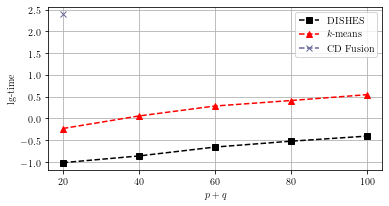

In [21]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)

p = [20, 40, 60, 80, 100]
ax.set_xticks(p)
ax.set_xlabel(r'$p+q$')
ax.set_ylabel('lg-time')

EE_color = 'r'
kmns_color = 'k'
mtl_color = [0.4,0.4,0.6]

ax.plot(p, np.log10(result_dishes['Timecost'][[0,9,10,11,12]]), 's--', color=EE_color, ms=6, label=r'DISHES')
#ax.plot(p, time_p_ee_2,'s-k', ms=4, label=r'EE-MTL ($M=100$)')

ax.plot(p, np.log10(result_kmns['Timecost'][[0,9,10,11,12]]),'^--', color=kmns_color, ms=6, label=r'$k$-means')
#ax.plot(p, time_p_kmns_2,'^-r', ms=4, label=r'$k$-means ($M=100$)')

ax.plot(p[:1], np.log10(result_cd['Timecost'][0]), 'x--', color=mtl_color, ms=6, label=r'CD Fusion')

plt.grid(axis='both')
plt.legend(loc='upper right')
plt.savefig('time-p.pdf',format='pdf',bbox_inches = 'tight')
plt.show()

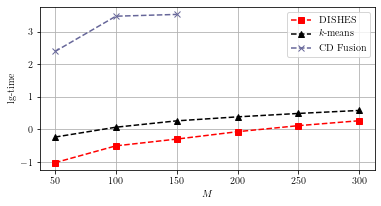

In [22]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)

M = [50, 100, 150, 200, 250, 300]
ax.set_xticks(M)
ax.set_xlabel(r'$M$')
ax.set_ylabel('lg-time')

EE_color = 'r'
kmns_color = 'k'
mtl_color = [0.4,0.4,0.6]

ax.plot(M, np.log10(result_dishes['Timecost'][:6]), 's--', color=EE_color, ms=6, label=r'DISHES')
#ax.plot(p, time_p_ee_2,'s-k', ms=4, label=r'EE-MTL ($M=100$)')

ax.plot(M, np.log10(result_kmns['Timecost'][:6]),'^--', color=kmns_color, ms=6, label=r'$k$-means')
#ax.plot(p, time_p_kmns_2,'^-r', ms=4, label=r'$k$-means ($M=100$)')

ax.plot(M[:3], np.log10(result_cd['Timecost'][:3]), 'x--', color=mtl_color, ms=6, label=r'CD Fusion')

plt.grid(axis='both')
plt.legend(loc='upper right')
plt.savefig('time-M.pdf',format='pdf',bbox_inches = 'tight')
plt.show()

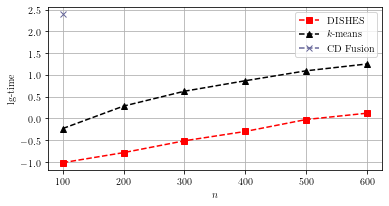

In [30]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)

n = [100, 200, 300, 400, 500, 600]
ax.set_xticks(n)
ax.set_xlabel(r'$n$')
ax.set_ylabel('lg-time')

EE_color = 'r'
kmns_color = 'k'
mtl_color = [0.4,0.4,0.6]

ax.plot(n, np.log10(result_dishes['Timecost'][[0, 13,14,15,16,17]]), 's--', color=EE_color, ms=6, label=r'DISHES')

ax.plot(n, np.log10(result_kmns['Timecost'][[0, 13,14,15,16,17]]),'^--', color=kmns_color, ms=6, label=r'$k$-means')

ax.plot(n[:1], np.log10(result_cd['Timecost'][0]), 'x--', color=mtl_color, ms=6, label=r'CD Fusion')

plt.grid(axis='both')
plt.legend(loc='upper right')
plt.savefig('time-n.pdf',format='pdf',bbox_inches = 'tight')
plt.show()

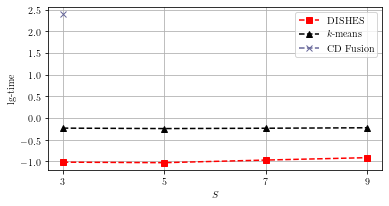

In [29]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)

S = [3,5,7,9]
ax.set_xticks(S)
ax.set_xlabel(r'$S$')
ax.set_ylabel('lg-time')

EE_color = 'r'
kmns_color = 'k'
mtl_color = [0.4,0.4,0.6]

ax.plot(S, np.log10(result_dishes['Timecost'][[0,6,7,8]]), 's--', color=EE_color, ms=6, label=r'DISHES')

ax.plot(S, np.log10(result_kmns['Timecost'][[0,6,7,8]]),'^--', color=kmns_color, ms=6, label=r'$k$-means')

ax.plot(S[:1], np.log10(result_cd['Timecost'][0]), 'x--', color=mtl_color, ms=6, label=r'CD Fusion')

plt.grid(axis='both')
plt.legend(loc='upper right')
plt.savefig('time-S.pdf',format='pdf',bbox_inches = 'tight')
plt.show()